In [1]:
%load_ext autoreload
%autoreload
import argparse
import copy
import json
import os
import sys

sys.path.append("../")
sys.path.append("../src")

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
from IPython import embed
from matplotlib import pyplot as plt
from torch.autograd import Variable


%matplotlib inline

In [3]:
%autoreload
import experiment.resnet3d_top20 as experiment
from src.i3dense import I3DenseNet
from src.i3res import I3ResNet
from src.mit_data import MITDataset
from src.train import train, validation_loss

In [4]:
dataset = experiment.dataset
dataloader = experiment.dataloader
val_dataloader = experiment.val_dataloader
resnet = torchvision.models.resnet50(pretrained=True)

In [8]:
cuda1 = torch.device("cuda:1")
num_classes = 20
resnet.fc = nn.Linear(2048, num_classes)
i3resnet = I3ResNet(copy.deepcopy(resnet), 32).to(device=cuda1)

In [ ]:
train(dataloader,val_dataloader,i3resnet,save_model_prefix="../experiment/resnet3d_top20/normalized_", device=cuda1,log_file="../experiment/resnet3d_top20/1212_log.csv")

Step 0/64000.0
----------
step:   10 loss: 0.5938
step:   20 loss: 0.2606
step:   30 loss: 0.2675
step:   40 loss: 0.2033
step:   50 loss: 0.2248
step:   60 loss: 0.2249
step:   70 loss: 0.1941
step:   80 loss: 0.2099
step:   90 loss: 0.2383
step:  100 loss: 0.2208
step:  110 loss: 0.2143
step:  120 loss: 0.2071
step:  130 loss: 0.2013
step:  140 loss: 0.2188
step:  150 loss: 0.2063
step:  160 loss: 0.2041
validation error step:  164 loss: 0.2161
Step 164/64000.0
----------
step:  170 loss: 0.1348
step:  180 loss: 0.1925
step:  190 loss: 0.2118
step:  200 loss: 0.2161
step:  210 loss: 0.1854
step:  220 loss: 0.2324
step:  230 loss: 0.2118
step:  240 loss: 0.1955
step:  250 loss: 0.1937
step:  260 loss: 0.2196


In [23]:
df = pd.read_csv("", index_col="iteration")

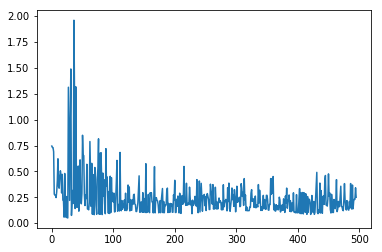

In [30]:
plt.plot(df["loss"].values)